In [110]:
# load gigs_data_cleaned.df (pickle)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
import seaborn as sns

# load data
with open('gigs_data_cleaned.df', 'rb') as f:
    gigs_data_cleaned = pickle.load(f)

gigs_data_cleaned.head()

,gig_title,rating_score,orders_in_queue,rating_counts,seller_level,category,delivery_times,prices,revisions,tags,language,country,member_since,features
0,I will design product advertisement poster and...,4.9,4,411,2,Poster Design,"[4, 4, 5]","[117.33, 156.44, 332.43]","[3, 6, inf]","['advertising poste', 'product poste', 'facebo...","English, Hindi",India,2019-06-01,"['1 Poster design + JPG, PNG, Print-Ready PDF ..."
1,I will make an animated lottie json for web or...,5.0,0,576,3,Lottie & Web Animation,"[2, 2, 3]","[136.88, 273.77, 625.76]","[1, 2, 2]","['lotti', 'gi', 'websit', 'sv']","English, Ukrainian",Ukraine,2020-03-01,"['Basic animation of one element - icon, butto..."
2,I will create high converting google ads ppc a...,4.9,3,27,2,Search Engine Marketing Management,"[4, 7, 10]","[567.09, 1017.0, 1350.0]","[1, 1, 1]","['google adword', 'google ad']","English, Czech, German",Germany,2021-04-01,['Setup 1 Campaign + Keywords Research + High...
3,I will do editing and fact checking ai generat...,5.0,0,1,1,Fact Checking,"[1, 1, 1]","[19.55, 39.11, 58.66]","[0, 0, 0]","['a', 'copywritin', 'article write']","English, Urdu",Pakistan,2021-11-01,"['i will write using chatgpt ', 'i will write ..."
4,I will create a pixel collectibles for nft col...,5.0,2,241,2,NFT Art,"[2, 3, 5]","[39.11, 136.88, 254.21]","[1, 1, 1]","['nft ar', 'nft desig', 'nft pixel ar', 'nf']","English, Indonesian, Javanese",Indonesia,2019-09-01,['[CONTACT ME FIRST BEFORE ORDER]\r\nYou can g...


median score:  195.0
mean score:  594.3408475648324
average score:  566.8071419954157


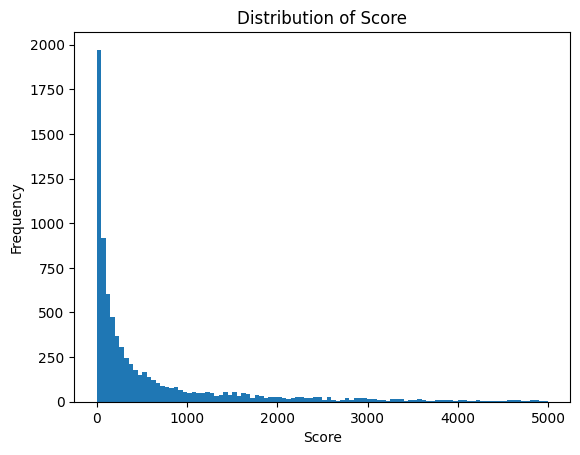

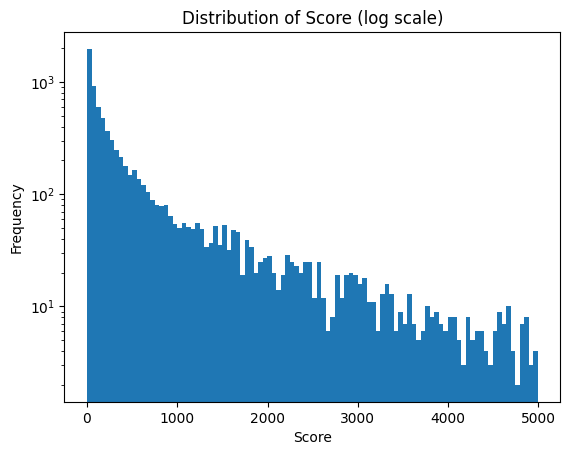

In [111]:
gigs_data_cleaned['rating_counts'] = pd.to_numeric(gigs_data_cleaned['rating_counts'], errors='coerce')
gigs_data_cleaned['rating_score'] = pd.to_numeric(gigs_data_cleaned['rating_score'], errors='coerce')
gigs_data_cleaned['score'] = gigs_data_cleaned['rating_counts'] * gigs_data_cleaned['rating_score']

# find the median, mean, average of 'score' column
median_score = gigs_data_cleaned['score'].median()
mean_score = gigs_data_cleaned['score'].mean()
average_score = gigs_data_cleaned['score'].sum() / len(gigs_data_cleaned['score'])

print('median score: ', median_score)
print('mean score: ', mean_score)
print('average score: ', average_score)

# plot the distribution of 'score' column
plt.hist(gigs_data_cleaned['score'], bins=100)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# plot it again with log scale
plt.hist(gigs_data_cleaned['score'], bins=100)
plt.title('Distribution of Score (log scale)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [112]:
def convert_text_to_frequency_dict(text):
    words = text.split()
    frequency_dict = {}
    for word in words:
        if word in frequency_dict:
            frequency_dict[word] += 1
        else:
            frequency_dict[word] = 1
    return frequency_dict

def frequencies_to_wordcloud(frequencies, max_words=100, title=None):
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=max_words).generate_from_frequencies(frequencies)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    if title:
        plt.title(title)
    plt.axis("off")
    plt.show()


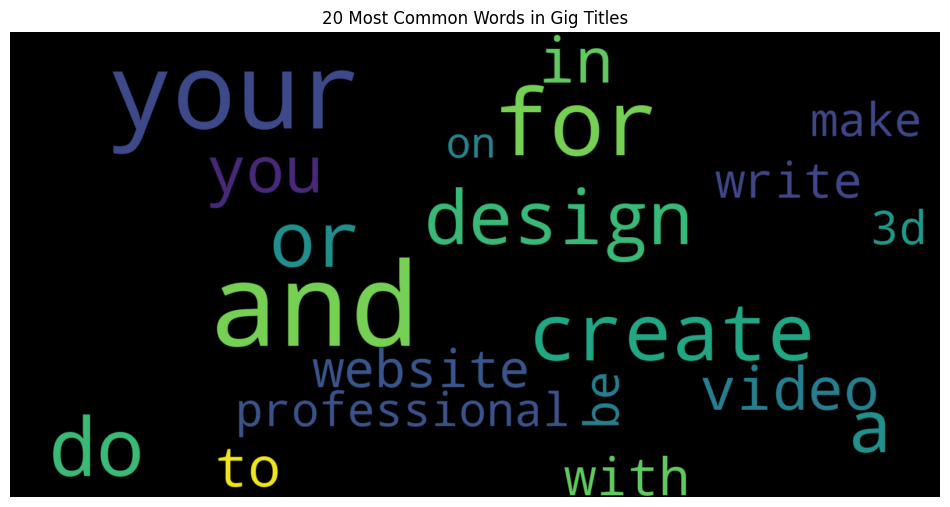

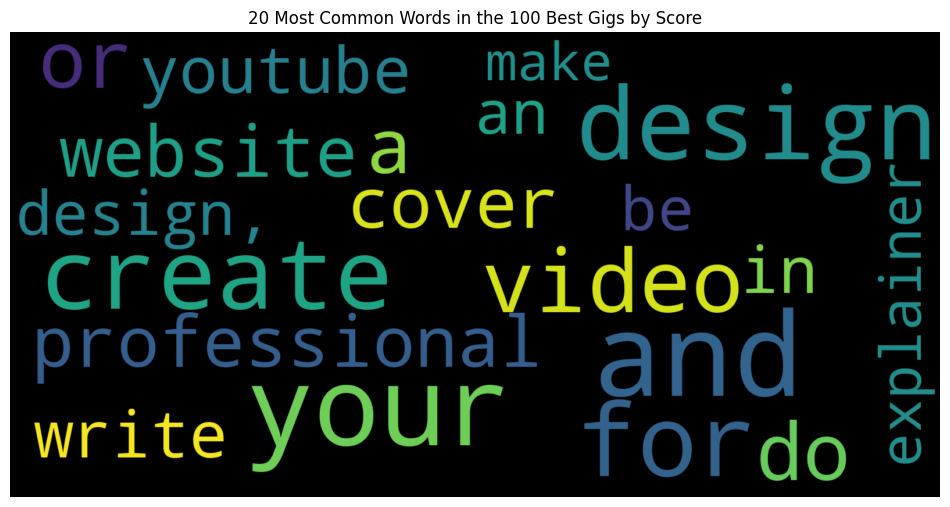

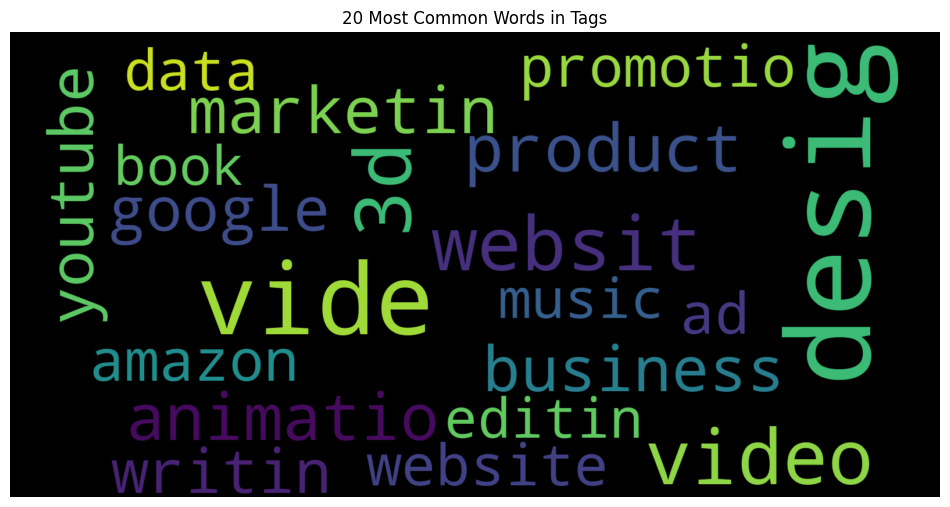

In [120]:
frequencies_all = convert_text_to_frequency_dict(gigs_data_cleaned['gig_title'].str.cat(sep=' '))

frequencies_all.pop('I', None)
frequencies_all.pop('will', None)

frequencies_to_wordcloud(frequencies_all, max_words=20, title="20 Most Common Words in Gig Titles")

# top 20 words in the 100 best gigs by score
frequencies = convert_text_to_frequency_dict(gigs_data_cleaned.sort_values(by='score', ascending=False).head(100)['gig_title'].str.cat(sep=' '))
frequencies.pop('I', None)
frequencies.pop('will', None)
frequencies_to_wordcloud(frequencies, max_words=20, title="20 Most Common Words in the 100 Best Gigs by Score")

# wordcloud of tags column (string that look like "['tag1', 'tag2', 'tag3']")
tags = gigs_data_cleaned['tags'].str.cat(sep=' ')
tags = tags.replace('[', '')
tags = tags.replace(']', '')
tags = tags.replace("'", '')
tags = tags.replace(",", '')
tags = tags.replace("  ", ' ')
frequencies = convert_text_to_frequency_dict(tags)
frequencies_to_wordcloud(frequencies, max_words=20, title="20 Most Common Words in Tags")


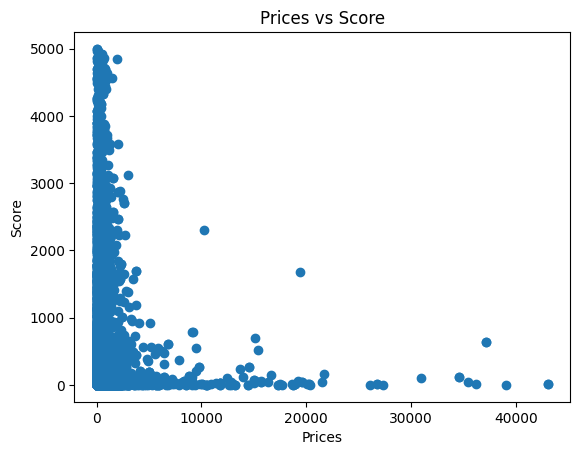

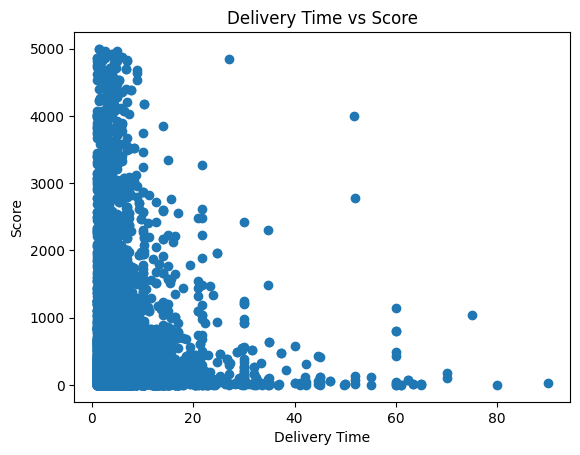

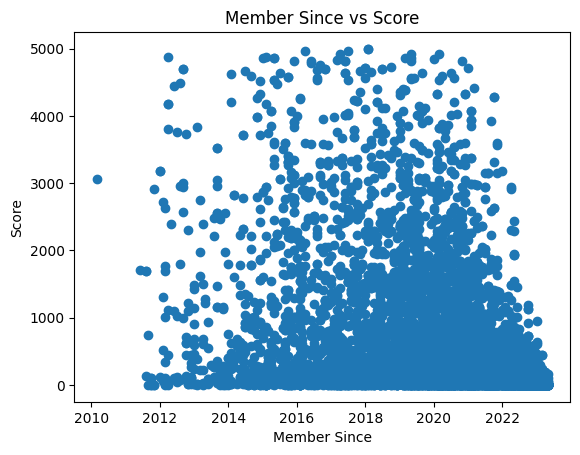

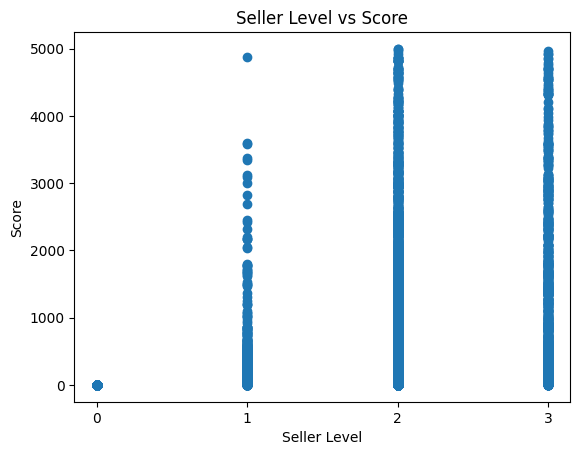

In [117]:
# create average price from the prices column list
gigs_data_cleaned['average_price'] = gigs_data_cleaned['prices'].apply(lambda x: np.mean(x))
# plot the prices vs the score
plt.scatter(gigs_data_cleaned['average_price'], gigs_data_cleaned['score'])
plt.title('Prices vs Score')
plt.xlabel('Prices')
plt.ylabel('Score')
plt.show()

# create average delivery time from the delivery_time column list
gigs_data_cleaned['average_delivery_time'] = gigs_data_cleaned['delivery_times'].apply(lambda x: np.mean(x))

# plot the delivery time vs the score
plt.scatter(gigs_data_cleaned['average_delivery_time'], gigs_data_cleaned['score'])
plt.title('Delivery Time vs Score')
plt.xlabel('Delivery Time')
plt.ylabel('Score')
plt.show()

# plot the member since vs the score
plt.scatter(gigs_data_cleaned['member_since'], gigs_data_cleaned['score'])
plt.title('Member Since vs Score')
plt.xlabel('Member Since')
plt.ylabel('Score')
plt.show()

# plot the seller_level vs the score, 
# MAKE SURE only the values 0,1,2,3 are plotted in the x-axis
plt.scatter(gigs_data_cleaned['seller_level'], gigs_data_cleaned['score'])
plt.title('Seller Level vs Score')
plt.xlabel('Seller Level')
plt.xticks([0,1,2,3])
plt.ylabel('Score')
plt.show()



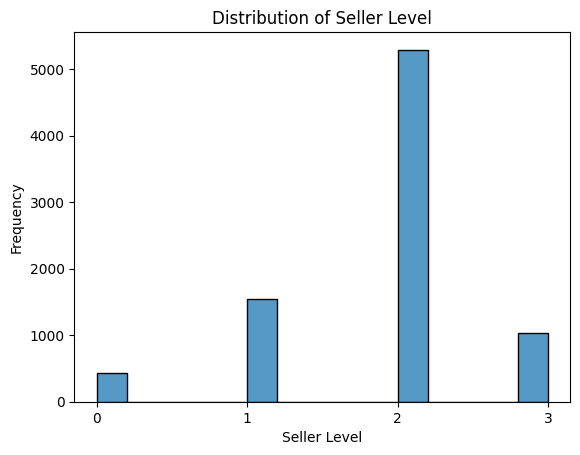

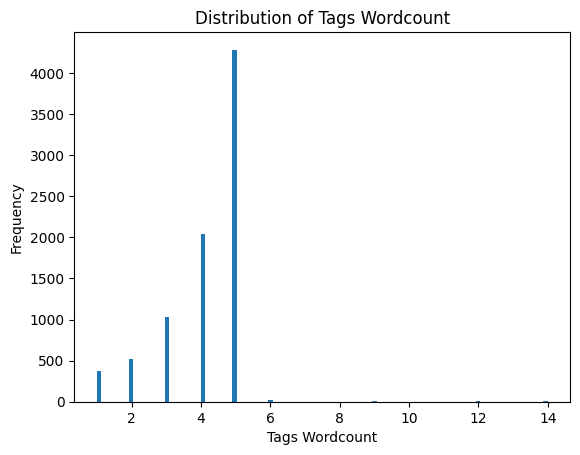

In [121]:
# plot the distribution of the level of the seller 
sns.histplot(gigs_data_cleaned['seller_level'])
plt.title('Distribution of Seller Level')
plt.xlabel('Seller Level')
plt.xticks([0,1,2,3])
plt.ylabel('Frequency')
plt.show()

# wordcount of tags column (string that look like "['tag1', 'tag2', 'tag3']")
gigs_data_cleaned['tags_wordcount'] = gigs_data_cleaned['tags'].str.count(',') + 1

# plot the distribution of 'tags_wordcount' column
plt.hist(gigs_data_cleaned['tags_wordcount'], bins=100)
plt.title('Distribution of Tags Wordcount')
plt.xlabel('Tags Wordcount')
plt.ylabel('Frequency')
plt.show()